<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/02%20-%20Features%20And%20Targets/00_Example_Variables_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set()

## 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

## 02 - Import data from Quix

In [43]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoicXVpeCIsImh0dHBzOi8vcXVpeC5haS9vd25lcl9pZCI6ImF1dGgwfGQ3ZDY0MWY4LTY5ZTktNDU2Zi1iYzcwLWI1YjMzN2U1OWVhZiIsImh0dHBzOi8vcXVpeC5haS90b2tlbl9pZCI6ImEyODM2NjYwLTk4YzktNDkyOC1iYmQzLTZjOGUxZjE5NjBiNyIsImh0dHBzOi8vcXVpeC5haS9leHAiOiIxNjQ4Njc3NjAwIiwiaXNzIjoiaHR0cHM6Ly9hdXRoLnF1aXguYWkvIiwic3ViIjoia2lxRXdFNVlCRmJpRUZ6REw2TjJFcTlPbjdTV1VLQjNAY2xpZW50cyIsImF1ZCI6InF1aXgiLCJpYXQiOjE2NDY5Mzk4MTQsImV4cCI6MTY0OTUzMTgxNCwiYXpwIjoia2lxRXdFNVlCRmJpRUZ6REw2TjJFcTlPbjdTV1VLQjMiLCJndHkiOiJjbGllbnQtY3JlZGVudGlhbHMiLCJwZXJtaXNzaW9ucyI6W119.fAy03mK9Hbm90Kb1E5eAbMvbeNiRcnSK4QSXcLGWA9iRQ0I9GjQoYbzt1dOpFjOlGwo4csUh3niT72Dai20hXrruVxqUoN7p2KhtX8g8gsVGjC8WliJqtzit20aLAQIBFcwH8Y63uJ38tvi9tG190stK63AJSNef4vBRq0rTV18YoaFfoTe6KAoZtXTbT-f6GQG97aLYKV3htFbyXKcXeK2mLIkdDEv7qGj-P6OOXSYVzh5g7hWhU1unttJigADU-P-9HH5iBZw_jNU1YPD2A0KTNGzqgGnFoqj_Rc4sUtxjPjFcNPuScY8Ny9kAiQJ7KqaoP-hs8ZSWY6xMzo4qDQ"

cryptos_list = ["BTC", "ETH", "BNB", "LUNA", "XRP", "ADA", "SOL", "AVAX", "DOT", 
                "DOGE", "SHIB", "MATIC", "WBTC", "CRO", "ATOM", "LTC", "NEAR", 
                "LINK", "UNI", "TRX", "BCH", "FTT", "LEO", "ALGO", "XLM"]

In [44]:
import requests
import pandas as pd
import io

def get_data_from_quix(cryptos_list, token):
  # Create numeric_parameters_list
  numeric_parameters_list = []
  for var_i in cryptos_list:
    dic_i = {'parameterName': var_i, 'aggregationType': 'None', 
             'topicIds': ['quix-bitcointutorialworkspace-precios-crypto']}
    numeric_parameters_list = numeric_parameters_list + [dic_i]

  # Query the data
  url = "https://telemetry-query-quix-bitcointutorialworkspace.platform.quix.ai/data/query"
  head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
  payload = {'numericParameters': numeric_parameters_list }
  response = requests.post(url, headers=head, json=payload)

  df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
  df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
  return df

In [45]:
df = get_data_from_quix(cryptos_list, token)
df

,Timestamp,BTC,ETH,BNB,LUNA,XRP,ADA,SOL,AVAX,DOT,...,LTC,NEAR,LINK,UNI,TRX,BCH,FTT,LEO,ALGO,XLM
0,2022-03-07 20:43:35.678490,37617.905306,2472.495468,374.838633,77.274201,0.715823,0.790371,81.558292,71.723455,16.258198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-07 20:44:22.997533,37653.656314,2474.299410,376.342309,77.315470,0.716373,0.792257,81.713566,71.871492,16.268945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-07 20:44:24.427554,37656.254518,2474.833863,376.364746,77.315289,0.716349,0.792941,81.748313,71.894705,16.271291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-07 20:44:25.866896,37656.896948,2475.136387,376.356773,77.336501,0.716376,0.792919,81.761283,71.898175,16.271291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-07 20:44:27.284184,37653.431670,2474.587657,375.959031,77.307134,0.716338,0.792829,81.745070,71.877764,16.273114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2022-03-10 19:28:49.618008,39254.188206,2604.581643,369.215253,99.214858,0.733854,0.805226,82.312693,72.761533,17.114205,...,102.666963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,2022-03-10 19:28:51.514107,39256.685979,2604.602906,369.236899,99.215847,0.733912,0.805264,82.316326,72.755596,17.115048,...,102.703707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,2022-03-10 19:28:53.518787,39256.532237,2604.714366,369.184104,99.205225,0.733848,0.805270,82.311672,72.760116,17.109973,...,102.704971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,2022-03-10 19:28:55.407331,39256.717417,2604.796388,369.239191,99.227988,0.733850,0.805441,82.316029,72.763336,17.115292,...,102.704938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
time_deltas = [ti.seconds for ti in df['Timestamp'].shift(-1)-df['Timestamp']]
max(time_deltas)

77960

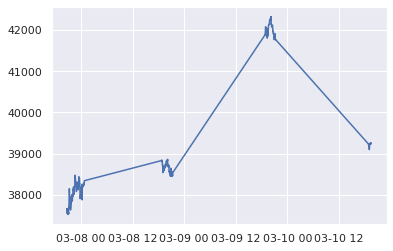

In [47]:
plt.plot(df['Timestamp'], df['BTC'])
plt.show()

In [48]:
df = df[df['Timestamp']<pd.to_datetime("03/08/2022 12:00:00")]
df

,Timestamp,BTC,ETH,BNB,LUNA,XRP,ADA,SOL,AVAX,DOT,...,LTC,NEAR,LINK,UNI,TRX,BCH,FTT,LEO,ALGO,XLM
0,2022-03-07 20:43:35.678490,37617.905306,2472.495468,374.838633,77.274201,0.715823,0.790371,81.558292,71.723455,16.258198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-07 20:44:22.997533,37653.656314,2474.299410,376.342309,77.315470,0.716373,0.792257,81.713566,71.871492,16.268945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-07 20:44:24.427554,37656.254518,2474.833863,376.364746,77.315289,0.716349,0.792941,81.748313,71.894705,16.271291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-07 20:44:25.866896,37656.896948,2475.136387,376.356773,77.336501,0.716376,0.792919,81.761283,71.898175,16.271291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-07 20:44:27.284184,37653.431670,2474.587657,375.959031,77.307134,0.716338,0.792829,81.745070,71.877764,16.273114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022-03-08 00:47:08.638946,38329.978432,2525.573598,383.292904,79.813854,0.725395,0.803469,82.633720,72.775950,16.579527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,2022-03-08 00:47:10.672125,38328.520127,2525.350515,383.457218,79.810105,0.725458,0.803616,82.636207,72.764023,16.581998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,2022-03-08 00:47:12.550930,38331.357713,2525.626646,383.401554,79.808269,0.725398,0.803753,82.636701,72.771268,16.581631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,2022-03-08 00:47:14.619468,38332.281904,2526.229894,383.574880,79.824962,0.725527,0.803753,82.650247,72.806373,16.581385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


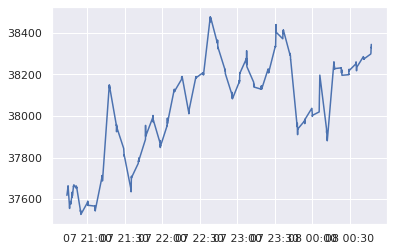

In [49]:
plt.plot(df['Timestamp'], df['BTC'])
plt.show()

(array([829.,   4.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,  40.]),
 array([  1. ,  33.3,  65.6,  97.9, 130.2, 162.5, 194.8, 227.1, 259.4,
        291.7, 324. ]),
 <a list of 10 Patch objects>)

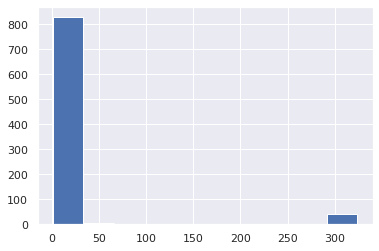

In [50]:
time_deltas = [ti.seconds for ti in df['Timestamp'].shift(-1)-df['Timestamp']]
plt.hist(time_deltas)

# 03 - Prepare data

In [58]:
# Get data with equally separated intervals
df = df.resample('30s').mean()

# 04 - Create Variables

# 05 - Create Target